# **Histogramas con eventos completos**

In [1]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import re

from google.colab import drive
drive.mount('/content/drive')

%matplotlib inline

Mounted at /content/drive


In [2]:
PATH_DRIVE = 'drive/MyDrive/Seminario-3-master'
PATH_DADOS = '/dados/'
PATH_FIGURE = '/histograms/'
FILE_DATOS_ESTACION = 'events_nuevo_ajustado.csv'
FILE_RELIEVE = 'GMRTv3_8_20210316topo_LR.grd'

!mkdir -p drive/MyDrive/Seminario-3-master/histograms

In [3]:
df = pd.read_csv(PATH_DRIVE + PATH_DADOS + FILE_DATOS_ESTACION,
                 sep = ';'
                )
df

,DATE_MIN_T,LON,LAT,DATE_MAX_T,MIN_T,MIN_T.1,LON_d,LAT_d,MAX_dT,HORAS,AREA
0,2011 01 07 16 15,-73.264,7.487,2011 01 07 15 15,205.6,205.6,-73.264,7.487,-69.6,2.0,6585
1,2011 01 09 00 15,-74.693,5.913,2011 01 08 21 15,205.8,205.8,-73.979,6.772,-64.8,3.5,22794
2,2011 01 15 00 15,-74.836,5.627,2011 01 14 23 15,206.7,206.7,-74.836,5.627,-75.9,0.5,2026
3,2011 01 16 03 45,-73.836,6.772,2011 01 16 03 15,207.2,207.2,-73.836,6.772,-50.6,1.0,3545
4,2011 01 17 00 15,-73.693,7.487,2011 01 16 23 15,209.9,209.9,-73.693,7.487,-74.3,0.5,3039
...,...,...,...,...,...,...,...,...,...,...,...
1942,2017 12 11 21 15,-74.836,5.913,2017 12 11 20 15,207.5,207.5,-74.836,5.913,-69.4,0.5,3799
1943,2017 12 28 23 45,-74.836,5.484,2017 12 28 23 45,202.5,202.5,-74.693,5.484,-72.2,6.0,8104
1944,2017 12 30 02 45,-74.121,6.485,2017 12 30 01 45,207.4,207.4,-74.121,6.485,-71.2,0.5,3545
1945,2017 12 30 04 15,-73.693,6.772,2017 12 30 03 15,207.9,207.9,-73.693,6.772,-59.3,0.5,10384


In [4]:
df = pd.read_csv(PATH_DRIVE + PATH_DADOS + FILE_DATOS_ESTACION,
                 sep = ';'
                )
df['DATE_MIN_T'] = pd.to_datetime(df['DATE_MIN_T'], format='%Y %m %d %H %M').dt.tz_localize('America/Bogota')
df['DATE_MAX_T'] = pd.to_datetime(df['DATE_MAX_T'], format='%Y %m %d %H %M').dt.tz_localize('America/Bogota')

In [5]:
df['hour_min_t'] = df['DATE_MIN_T'].dt.hour
df['month_min_t'] = df['DATE_MIN_T'].dt.month
df['year_min_t'] = df['DATE_MIN_T'].dt.year
df['hour_max_dt'] = df['DATE_MAX_T'].dt.hour
df['month_max_dt'] = df['DATE_MAX_T'].dt.month
df['year_max_dt'] = df['DATE_MAX_T'].dt.year

Análisis por año de la temperatura.

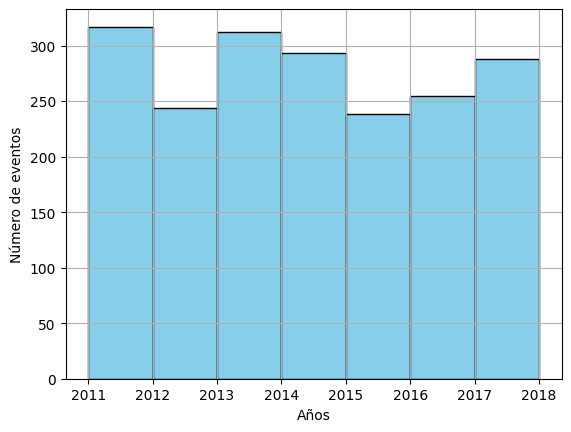

In [6]:
fig, ax = plt.subplots()

# Gráfico del histograma
df['year_min_t'].plot(kind = 'hist', ax=ax, edgecolor='black', color='skyblue', bins = range(2011, 2019))

# # Gráfico de la estimativa de la densidad del kernel en el mismo gráfico sobre el mismo gráfico
# ax2 = df['hour_min_t'].plot(kind='kde', secondary_y=True, ax=ax, color='red')
# ax2.set_ylabel("Densidad")

ax.set_ylim(0)
ax.set_xlim()
ax.grid(True)
ax.set_xlabel("Años")
ax.set_xticks(range(2011, 2019))
#ax.set_title('')
ax.set_ylabel("Número de eventos")
plt.savefig(PATH_DRIVE + PATH_FIGURE + 'Histograma_año_Temp.png', format='png')

In [7]:
df['year_min_t'].value_counts()


2011    317
2013    312
2014    293
2017    288
2016    255
2012    244
2015    238
Name: year_min_t, dtype: int64

In [8]:
df

,DATE_MIN_T,LON,LAT,DATE_MAX_T,MIN_T,MIN_T.1,LON_d,LAT_d,MAX_dT,HORAS,AREA,hour_min_t,month_min_t,year_min_t,hour_max_dt,month_max_dt,year_max_dt
0,2011-01-07 16:15:00-05:00,-73.264,7.487,2011-01-07 15:15:00-05:00,205.6,205.6,-73.264,7.487,-69.6,2.0,6585,16,1,2011,15,1,2011
1,2011-01-09 00:15:00-05:00,-74.693,5.913,2011-01-08 21:15:00-05:00,205.8,205.8,-73.979,6.772,-64.8,3.5,22794,0,1,2011,21,1,2011
2,2011-01-15 00:15:00-05:00,-74.836,5.627,2011-01-14 23:15:00-05:00,206.7,206.7,-74.836,5.627,-75.9,0.5,2026,0,1,2011,23,1,2011
3,2011-01-16 03:45:00-05:00,-73.836,6.772,2011-01-16 03:15:00-05:00,207.2,207.2,-73.836,6.772,-50.6,1.0,3545,3,1,2011,3,1,2011
4,2011-01-17 00:15:00-05:00,-73.693,7.487,2011-01-16 23:15:00-05:00,209.9,209.9,-73.693,7.487,-74.3,0.5,3039,0,1,2011,23,1,2011
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1942,2017-12-11 21:15:00-05:00,-74.836,5.913,2017-12-11 20:15:00-05:00,207.5,207.5,-74.836,5.913,-69.4,0.5,3799,21,12,2017,20,12,2017
1943,2017-12-28 23:45:00-05:00,-74.836,5.484,2017-12-28 23:45:00-05:00,202.5,202.5,-74.693,5.484,-72.2,6.0,8104,23,12,2017,23,12,2017
1944,2017-12-30 02:45:00-05:00,-74.121,6.485,2017-12-30 01:45:00-05:00,207.4,207.4,-74.121,6.485,-71.2,0.5,3545,2,12,2017,1,12,2017
1945,2017-12-30 04:15:00-05:00,-73.693,6.772,2017-12-30 03:15:00-05:00,207.9,207.9,-73.693,6.772,-59.3,0.5,10384,4,12,2017,3,12,2017


### Histograma 1: Análisis por hora de la temperatura.

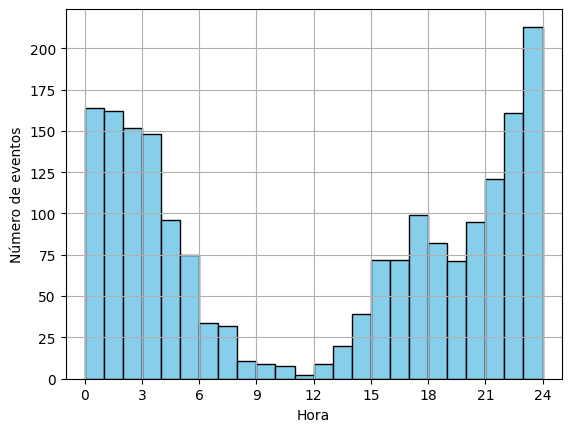

In [9]:
fig, ax = plt.subplots()

# Gráfico del histograma
df['hour_min_t'].plot(kind = 'hist', ax=ax, edgecolor='black', color='skyblue', bins = range(0, 25))

# # Gráfico de la estimativa de la densidad del kernel en el mismo gráfico sobre el mismo gráfico
# ax2 = df['hour_min_t'].plot(kind='kde', secondary_y=True, ax=ax, color='red')
# ax2.set_ylabel("Densidad")

ax.set_ylim(0)
ax.set_xlim(-1, 25)
ax.grid(True)
ax.set_xlabel("Hora")
ax.set_xticks(range(0, 25, 3))
ax.set_ylabel("Número de eventos")
plt.savefig(PATH_DRIVE + PATH_FIGURE + 'Histograma_hora_Temp.png', format='png')

### Histograma 2: Análisis por mes de la temperatura.

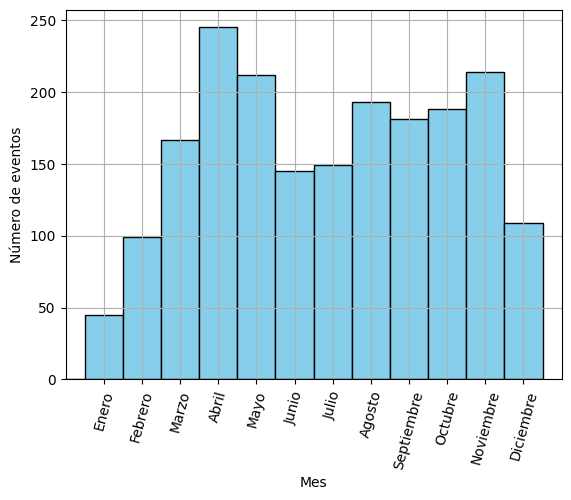

In [10]:
fig, ax = plt.subplots()

# Gráfico del histograma
df['month_min_t'].plot(kind = 'hist', ax=ax, edgecolor='black', color='skyblue', bins = range(0,14), align='left')

# # Gráfico de la estimativa de la densidad del kernel en el mismo gráfico sobre el mismo gráfico
# ax2 = df['month_min_t'].plot(kind='kde', secondary_y=True, ax=ax, color='red')
# ax2.set_ylabel("Densidad")

ax.set_ylim(0)
ax.set_xlim(0, 13)
# bins_labels(range(0,14), 20)
ax.grid(True)
ax.set_xlabel("Mes")
ax.set_xticks(range(1, 13, 1))
Meses = ['Enero', 'Febrero',
         'Marzo', 'Abril',
         'Mayo', 'Junio',
         'Julio', 'Agosto',
         'Septiembre', 'Octubre',
         'Noviembre', 'Diciembre']
ax.set_xticklabels(Meses, rotation=75)
ax.set_ylabel("Número de eventos")
plt.savefig(PATH_DRIVE + PATH_FIGURE + 'Histograma_mes_Temp.png', format='png')

### Histograma 3: Análisis por hora de la disminución de temperatura.

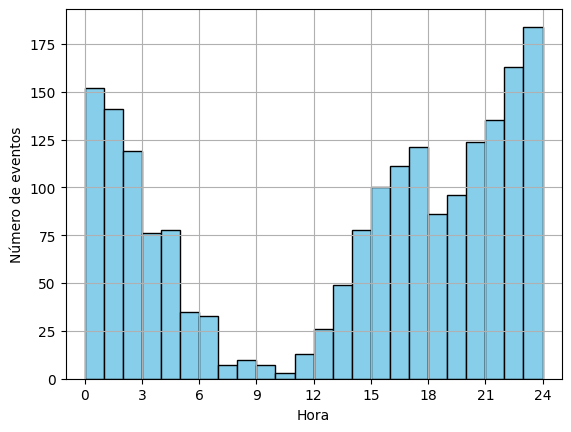

In [11]:
fig, ax = plt.subplots()

# Gráfico del histograma
df['hour_max_dt'].plot(kind = 'hist', ax=ax, edgecolor='black', color='skyblue', bins = range(0, 25))

# # Gráfico de la estimativa de la densidad del kernel en el mismo gráfico sobre el mismo gráfico
# ax2 = df['hour_max_dt'].plot(kind='kde', secondary_y=True, ax=ax, color='red')
# ax2.set_ylabel("Densidad")

ax.set_ylim(0)
ax.set_xlim(-1, 25)
ax.grid(True)
ax.set_xlabel("Hora")
ax.set_ylabel("Número de eventos")
ax.set_xticks(range(0, 25, 3))
plt.savefig(PATH_DRIVE + PATH_FIGURE + 'Histograma_hora_dism.png', format='png')

### Histograma 4: Análisis por mes de la disminución de temperatura.

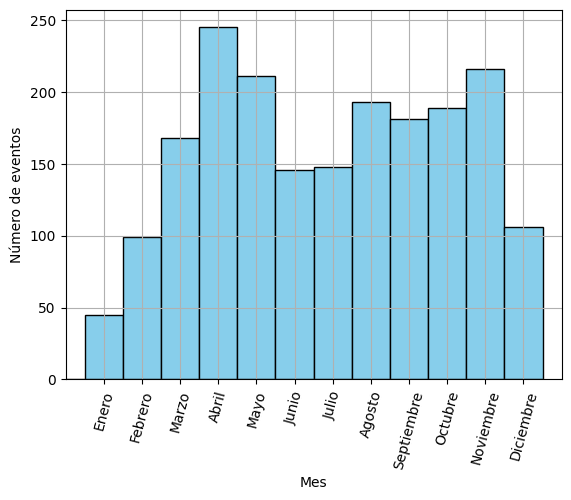

In [12]:
fig, ax = plt.subplots()

# Gráfico del histograma
df['month_max_dt'].plot(kind = 'hist', ax=ax, edgecolor='black', color='skyblue', bins = range(0,14), align='left')

# # Gráfico de la estimativa de la densidad del kernel en el mismo gráfico sobre el mismo gráfico
# ax2 = df['month_max_dt'].plot(kind='kde', secondary_y=True, ax=ax, color='red')
# ax2.set_ylabel("Densidad")

ax.set_ylim(0)
ax.set_xlim(0, 13)
ax.grid(True)
ax.set_xlabel("Mes")
ax.set_xticks(range(1, 13, 1))
Meses = ['Enero', 'Febrero',
         'Marzo', 'Abril',
         'Mayo', 'Junio',
         'Julio', 'Agosto',
         'Septiembre', 'Octubre',
         'Noviembre', 'Diciembre']
ax.set_xticklabels(Meses, rotation=75)
ax.set_ylabel("Número de eventos")
plt.savefig(PATH_DRIVE + PATH_FIGURE + 'Histograma_mes_dism.png', format='png')

# **Histogramas en horario nocturno (20h hasta 06h)**




In [13]:
df_nocturno = df.loc[(df['hour_min_t'] >= 20) | (df['hour_min_t'] < 7)]

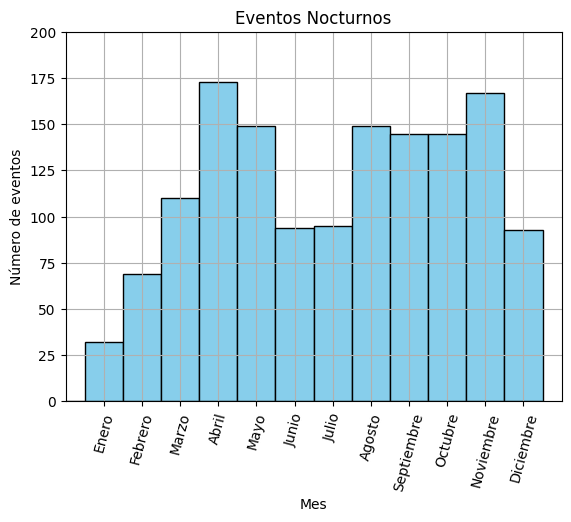

In [14]:
fig, ax = plt.subplots()

# Gráfico del histograma
df_nocturno['month_min_t'].plot(kind = 'hist', ax=ax, edgecolor='black', color='skyblue', bins = range(0,14), align='left')

# Gráfico de la estimativa de la densidad del kernel en el mismo gráfico sobre el mismo gráfico

ax.set_ylim(0)
ax.set_xlim(0, 13)
# bins_labels(range(0,14), 20)
ax.grid(True)
ax.set_xlabel("Mes")
ax.set_title('Eventos Nocturnos')
ax.set_xticks(range(1, 13, 1))
#ax.set_yticks(range(0, 250,1))
ax.set_ylim(0,200)
Meses = ['Enero', 'Febrero',
         'Marzo', 'Abril',
         'Mayo', 'Junio',
         'Julio', 'Agosto',
         'Septiembre', 'Octubre',
         'Noviembre', 'Diciembre']
ax.set_xticklabels(Meses, rotation=75)
ax.set_ylabel("Número de eventos")
plt.savefig(PATH_DRIVE + PATH_FIGURE + 'Histograma_mes_Temp_nocturno.png', format='png')

In [15]:
df_nocturno

,DATE_MIN_T,LON,LAT,DATE_MAX_T,MIN_T,MIN_T.1,LON_d,LAT_d,MAX_dT,HORAS,AREA,hour_min_t,month_min_t,year_min_t,hour_max_dt,month_max_dt,year_max_dt
1,2011-01-09 00:15:00-05:00,-74.693,5.913,2011-01-08 21:15:00-05:00,205.8,205.8,-73.979,6.772,-64.8,3.5,22794,0,1,2011,21,1,2011
2,2011-01-15 00:15:00-05:00,-74.836,5.627,2011-01-14 23:15:00-05:00,206.7,206.7,-74.836,5.627,-75.9,0.5,2026,0,1,2011,23,1,2011
3,2011-01-16 03:45:00-05:00,-73.836,6.772,2011-01-16 03:15:00-05:00,207.2,207.2,-73.836,6.772,-50.6,1.0,3545,3,1,2011,3,1,2011
4,2011-01-17 00:15:00-05:00,-73.693,7.487,2011-01-16 23:15:00-05:00,209.9,209.9,-73.693,7.487,-74.3,0.5,3039,0,1,2011,23,1,2011
5,2011-01-27 01:45:00-05:00,-74.121,6.199,2011-01-26 22:15:00-05:00,192.7,192.7,-74.550,5.770,-70.2,9.0,29126,1,1,2011,22,1,2011
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1942,2017-12-11 21:15:00-05:00,-74.836,5.913,2017-12-11 20:15:00-05:00,207.5,207.5,-74.836,5.913,-69.4,0.5,3799,21,12,2017,20,12,2017
1943,2017-12-28 23:45:00-05:00,-74.836,5.484,2017-12-28 23:45:00-05:00,202.5,202.5,-74.693,5.484,-72.2,6.0,8104,23,12,2017,23,12,2017
1944,2017-12-30 02:45:00-05:00,-74.121,6.485,2017-12-30 01:45:00-05:00,207.4,207.4,-74.121,6.485,-71.2,0.5,3545,2,12,2017,1,12,2017
1945,2017-12-30 04:15:00-05:00,-73.693,6.772,2017-12-30 03:15:00-05:00,207.9,207.9,-73.693,6.772,-59.3,0.5,10384,4,12,2017,3,12,2017


# **Histogramas en horario diurno (06h hasta 20h)**



In [16]:
df_diurno = df.loc[(df['hour_min_t'] >= 7) & (df['hour_min_t'] < 20)]

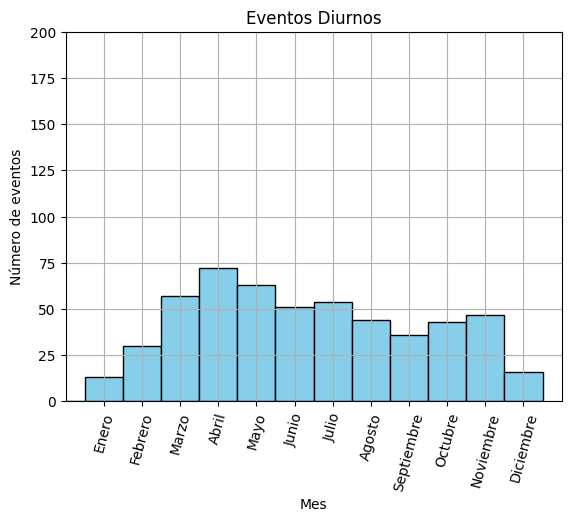

In [17]:
fig, ax = plt.subplots()

# Gráfico del histograma
df_diurno['month_min_t'].plot(kind = 'hist', ax=ax, edgecolor='black', color='skyblue', bins = range(0,14), align='left')

# Gráfico de la estimativa de la densidad del kernel en el mismo gráfico sobre el mismo gráfico

ax.set_ylim(0)
ax.set_xlim(0, 13)
# bins_labels(range(0,14), 20)
ax.grid(True)
ax.set_xlabel("Mes")
ax.set_title('Eventos Diurnos')
ax.set_xticks(range(1, 13, 1))
ax.set_ylim(0,200)
Meses = ['Enero', 'Febrero',
         'Marzo', 'Abril',
         'Mayo', 'Junio',
         'Julio', 'Agosto',
         'Septiembre', 'Octubre',
         'Noviembre', 'Diciembre']
ax.set_xticklabels(Meses, rotation=75)
ax.set_ylabel("Número de eventos")
plt.savefig(PATH_DRIVE + PATH_FIGURE + 'Histograma_mes_Temp_diurno.png', format='png')

In [18]:
df_diurno

,DATE_MIN_T,LON,LAT,DATE_MAX_T,MIN_T,MIN_T.1,LON_d,LAT_d,MAX_dT,HORAS,AREA,hour_min_t,month_min_t,year_min_t,hour_max_dt,month_max_dt,year_max_dt
0,2011-01-07 16:15:00-05:00,-73.264,7.487,2011-01-07 15:15:00-05:00,205.6,205.6,-73.264,7.487,-69.6,2.0,6585,16,1,2011,15,1,2011
7,2011-02-08 17:45:00-05:00,-73.550,8.059,2011-02-08 16:45:00-05:00,206.6,206.6,-73.550,8.059,-68.3,1.0,4558,17,2,2011,16,2,2011
9,2011-02-11 19:15:00-05:00,-74.407,7.058,2011-02-11 18:15:00-05:00,203.9,203.9,-74.407,7.058,-88.4,1.5,4052,19,2,2011,18,2,2011
12,2011-02-13 19:45:00-05:00,-73.550,7.916,2011-02-13 18:45:00-05:00,206.9,206.9,-73.550,7.916,-58.9,0.5,2786,19,2,2011,18,2,2011
14,2011-02-15 07:15:00-05:00,-73.836,7.630,2011-02-15 06:45:00-05:00,203.0,203.0,-73.979,7.773,-76.9,1.5,2532,7,2,2011,6,2,2011
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1905,2017-11-03 18:45:00-05:00,-74.836,5.055,2017-11-03 17:15:00-05:00,198.8,198.8,-74.836,4.912,-83.5,2.0,4052,18,11,2017,17,11,2017
1916,2017-11-09 15:45:00-05:00,-73.836,8.059,2017-11-09 14:45:00-05:00,204.3,204.3,-73.836,8.059,-76.8,1.5,4305,15,11,2017,14,11,2017
1920,2017-11-13 09:15:00-05:00,-74.121,6.772,2017-11-13 09:45:00-05:00,198.7,198.7,-73.693,6.915,-52.6,4.5,4305,9,11,2017,9,11,2017
1921,2017-11-13 16:15:00-05:00,-73.550,8.059,2017-11-13 15:15:00-05:00,195.3,195.3,-73.550,8.059,-85.2,5.0,14943,16,11,2017,15,11,2017
